In [81]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Stores Data

In [82]:
#Read Dataset and Get Inital few rows and Dataset dataType information
storesData = pd.read_csv('stores.csv')

storesData.head(), storesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


(   store_nbr           city                           state type  cluster
 0          1          Quito                       Pichincha    D       13
 1          2          Quito                       Pichincha    D       13
 2          3          Quito                       Pichincha    D        8
 3          4          Quito                       Pichincha    D        9
 4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4,
 None)

In [83]:
# Check for missing values
missing_values = storesData.isnull().sum()
has_nan = storesData.isnull().values.any()


# Unique values in each column
unique_values = storesData.nunique()

In [84]:
print("Missing Values in Store Data \n", missing_values)
print("NaN Values in Store Data \n", has_nan)

Missing Values in Store Data 
 store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
NaN Values in Store Data 
 False


In [85]:
print("Unique Values in Store Data \n",unique_values)

Unique Values in Store Data 
 store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64


In [86]:
storesData.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [87]:
storesData['type'].value_counts().sort_index()

type
A     9
B     8
C    15
D    18
E     4
Name: count, dtype: int64

In [88]:
storesData['city'].value_counts().sort_values(ascending=False)

city
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Salinas           1
Cayambe           1
Riobamba          1
Ibarra            1
Guaranda          1
Puyo              1
Libertad          1
Babahoyo          1
Daule             1
Playas            1
Loja              1
Esmeraldas        1
Quevedo           1
El Carmen         1
Name: count, dtype: int64

In [89]:
storesData['state'].value_counts().sort_index

<bound method Series.sort_index of state
Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: count, dtype: int64>

In [90]:
storesData['cluster'].value_counts().sort_values(ascending=False)

cluster
3     7
6     6
10    6
15    5
13    4
14    4
1     3
8     3
4     3
11    3
9     2
7     2
2     2
12    1
5     1
16    1
17    1
Name: count, dtype: int64

In [91]:
#Type D Count by City
type_d_counts = storesData[storesData['type'] == 'D']['city'].value_counts().sort_values(ascending=False)

#Type D Count by States
type_d_states = storesData[storesData['type'] == 'D']['state'].value_counts().sort_values(ascending=False)

#Type D Count by Cluster
type_d_clusters = storesData[storesData['type'] == 'D']['cluster'].value_counts().sort_values(ascending=False)


print("Cities-wise Count of Type 'D' \n\n",type_d_counts)
print("\n\n State-wise Count of Type 'D' \n\n",type_d_states)
print("\n\n Cluster-wise Count of Type 'D' \n\n",type_d_clusters)

Cities-wise Count of Type 'D' 

 city
Quito            7
Guayaquil        2
Cuenca           2
Santo Domingo    1
Ambato           1
Salinas          1
Daule            1
Loja             1
Machala          1
Manta            1
Name: count, dtype: int64


 State-wise Count of Type 'D' 

 state
Pichincha                         7
Guayas                            3
Azuay                             2
Santo Domingo de los Tsachilas    1
Tungurahua                        1
Santa Elena                       1
Loja                              1
El Oro                            1
Manabi                            1
Name: count, dtype: int64


 Cluster-wise Count of Type 'D' 

 cluster
13    4
8     3
4     3
1     3
9     2
2     2
10    1
Name: count, dtype: int64


In [92]:
#Type E Count by City
type_e_counts = storesData[storesData['type'] == 'E']['city'].value_counts().sort_values(ascending=False)

#Type E Count by States
type_e_states = storesData[storesData['type'] == 'E']['state'].value_counts().sort_values(ascending=False)

#Type E Count by Cluster
type_e_clusters = storesData[storesData['type'] == 'E']['cluster'].value_counts().sort_values(ascending=False)


print("Cities-wise Count of Type 'E' \n\n",type_e_counts)
print("\n\n State-wise Count of Type 'E' \n\n",type_e_states)
print("\n\n Cluster-wise Count of Type 'E' \n\n",type_e_clusters)

Cities-wise Count of Type 'E' 

 city
Guayaquil     2
Libertad      1
Esmeraldas    1
Name: count, dtype: int64


 State-wise Count of Type 'E' 

 state
Guayas        3
Esmeraldas    1
Name: count, dtype: int64


 Cluster-wise Count of Type 'E' 

 cluster
10    4
Name: count, dtype: int64


In [93]:
#City Guayaquil Data
guayaquil_df = storesData[storesData['city'] == 'Guayaquil']

# Display the filtered dataframe
print(guayaquil_df.sort_values(by='type'))

    store_nbr       city   state type  cluster
50         51  Guayaquil  Guayas    A       17
33         34  Guayaquil  Guayas    B        6
29         30  Guayaquil  Guayas    C        3
31         32  Guayaquil  Guayas    C        3
23         24  Guayaquil  Guayas    D        1
25         26  Guayaquil  Guayas    D       10
27         28  Guayaquil  Guayas    E       10
28         29  Guayaquil  Guayas    E       10


In [94]:
#City Quito Data
Quito_df = storesData[storesData['city'] == 'Quito']

# Display the filtered dataframe
print(Quito_df.sort_values(by='type'))

quito_city_type_count = storesData[storesData['city'] == 'Quito']['type'].value_counts().sort_values(ascending=False)
print("\n\nQuito City Type Count",quito_city_type_count.sort_index())

    store_nbr   city      state type  cluster
48         49  Quito  Pichincha    A       11
46         47  Quito  Pichincha    A       14
45         46  Quito  Pichincha    A       14
44         45  Quito  Pichincha    A       11
43         44  Quito  Pichincha    A        5
47         48  Quito  Pichincha    A       14
19         20  Quito  Pichincha    B        6
17         18  Quito  Pichincha    B       16
8           9  Quito  Pichincha    B        6
9          10  Quito  Pichincha    C       15
16         17  Quito  Pichincha    C       12
7           8  Quito  Pichincha    D        8
6           7  Quito  Pichincha    D        8
5           6  Quito  Pichincha    D       13
3           4  Quito  Pichincha    D        9
2           3  Quito  Pichincha    D        8
1           2  Quito  Pichincha    D       13
0           1  Quito  Pichincha    D       13


Quito City Type Count type
A    6
B    3
C    2
D    7
Name: count, dtype: int64


In [95]:
#State Pichincha Data
pichincha_df = storesData[storesData['state'] == 'Pichincha']

# Display the filtered dataframe
print(Pichincha_df.sort_values(by='type'))

Empty DataFrame
Columns: [store_nbr, city, state, type, cluster]
Index: []


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


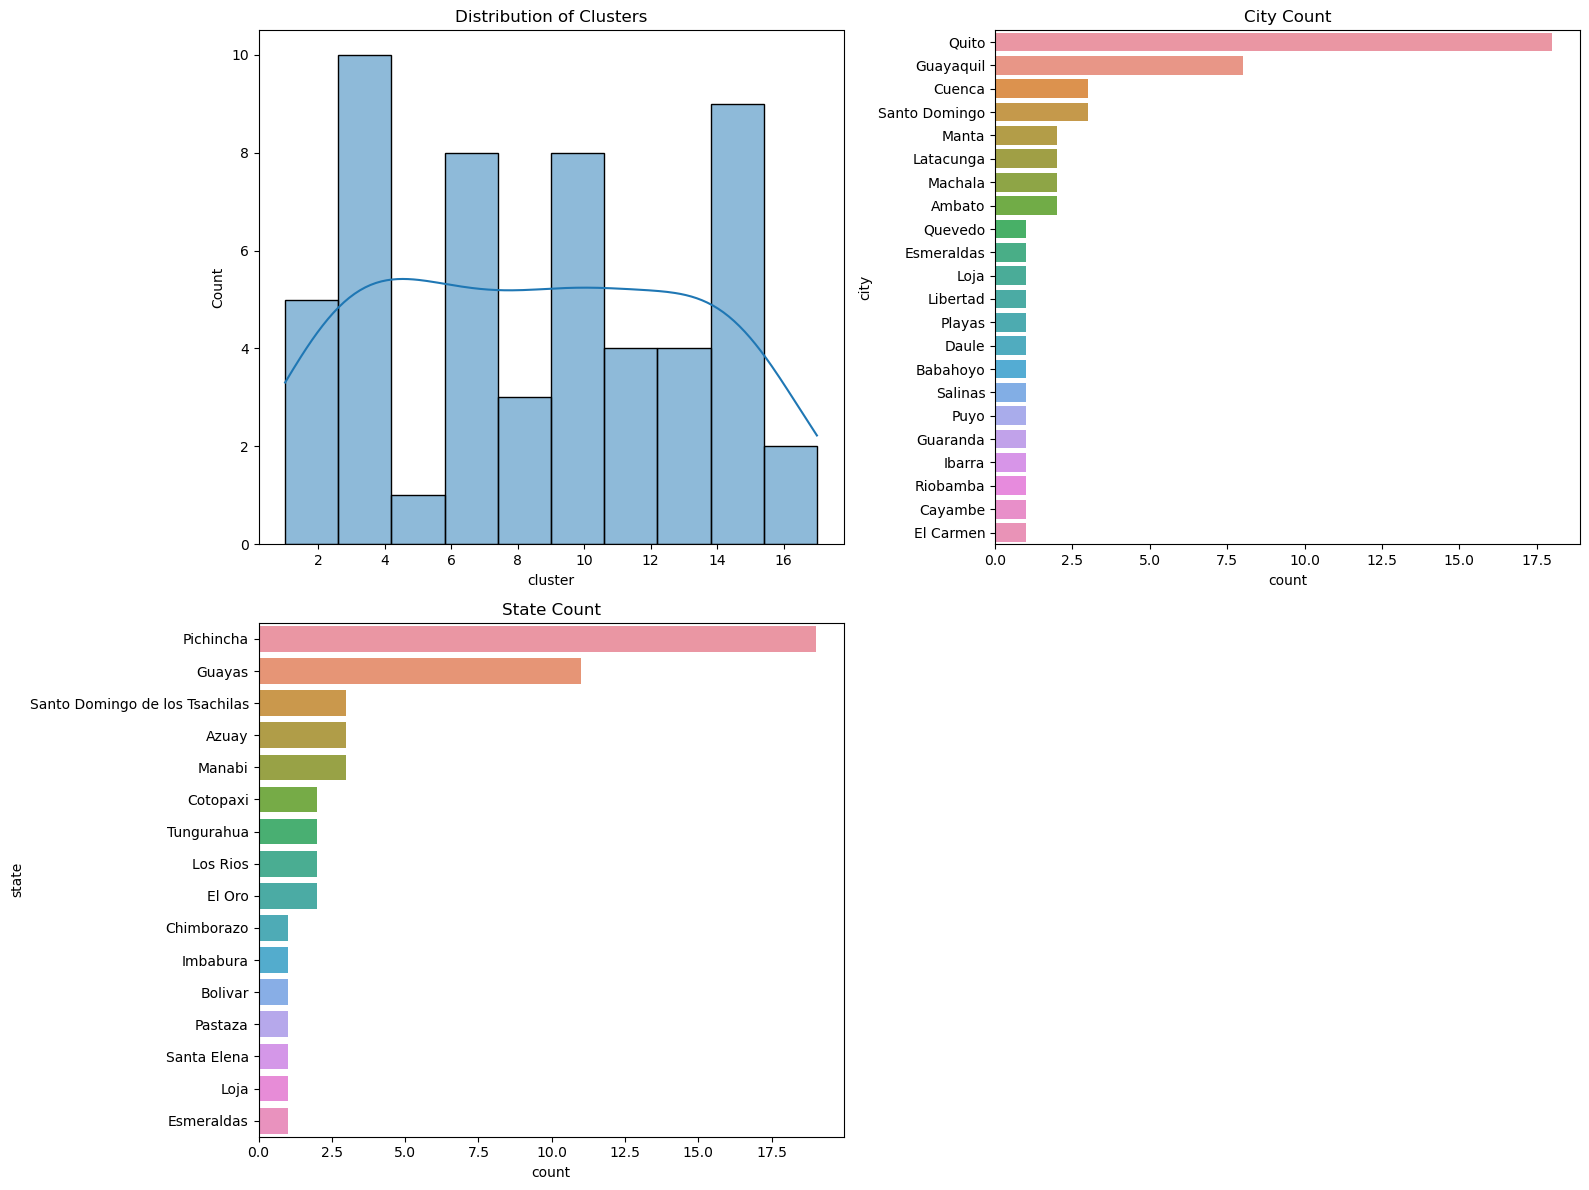

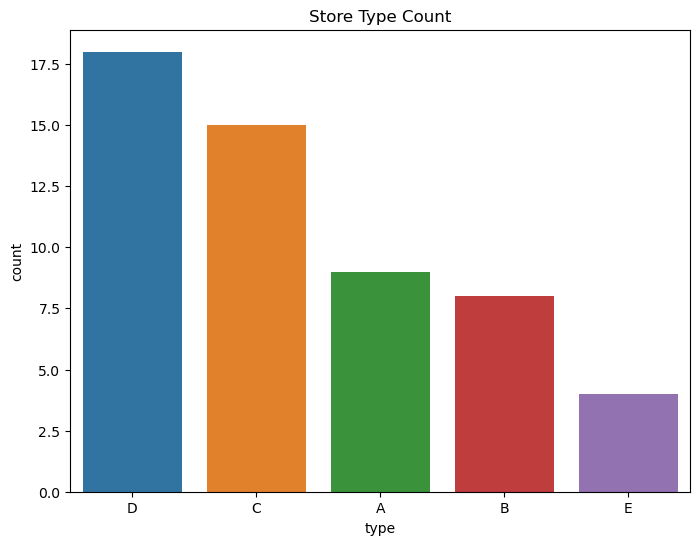

In [96]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(storesData['cluster'], bins=10, kde=True)
plt.title('Distribution of Clusters')

# Bar plots for categorical columns
plt.subplot(2, 2, 2)
sns.countplot(y='city', data=storesData, order=storesData['city'].value_counts().index)
plt.title('City Count')

plt.subplot(2, 2, 3)
sns.countplot(y='state', data=storesData, order=storesData['state'].value_counts().index)
plt.title('State Count')

plt.tight_layout()
plt.show()

# Bar plot for store types
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=storesData, order=storesData['type'].value_counts().index)
plt.title('Store Type Count')
plt.show()
